In [ ]:
%tensorflow_version 1.x magic
from keras import models
from keras import layers
from keras.datasets import reuters

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x magic:`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# Encode test data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Encode labels (one-hot encoding)
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
one_hot_train_labels.shape

(8982, 46)

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 91us/step - loss: 2.7889 - acc: 0.5135 - val_loss: 1.7945 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 63us/step - loss: 1.4725 - acc: 0.7130 - val_loss: 1.3459 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 63us/step - loss: 1.0816 - acc: 0.7719 - val_loss: 1.2021 - val_acc: 0.7310
Epoch 4/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.8640 - acc: 0.8140 - val_loss: 1.0855 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.6950 - acc: 0.8505 - val_loss: 1.0463 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.5596 - acc: 0.8846 - val_loss: 0.9495 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.4549 - acc: 0.9060 - val_loss: 0.9606 - val_acc: 0.8050
Epoch 8

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)
print(model.metrics_names)

2246/2246 [==============================] - 0s 104us/step
[1.2083074509407512, 0.788512911843277]
['loss', 'acc']


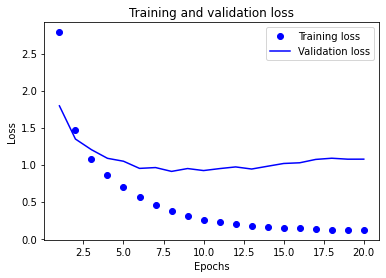

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

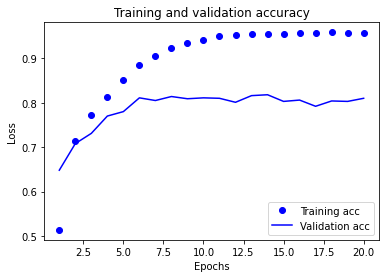

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()